# Logistic Regression - 1

## 1. Introduction

Logistic Regression is a method when the variable to be determined(the dependent variable) is categorical. It might be helpful to think of it as a probabilistic classification model. It is used to assign observations to a discrete set of classes. Logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes. For example, To predict

1. If an email is spam(1) or not(0)
2. If a given image is of a cat(1) or not(0)
3. If a tumor is malignant(1) or not(0)

> Although multiclass classification is possible as well (ex: Movie Rating from 1 to 5, or food preference between vegan, veg or non-veg) it is out of scope for now. We will be taking it up in the subsequent notebooks.



### 1.1. Comparison To Linear Regression

Where Linear Regression is used to predict continuous numerical values, Logistic Regression's predictions are discrete (only certain values or categories are allowed). It represents the probability of the sample belonging to a particular category.

### 1.2. Binary Logistic Regression
Say you are given data on student exam results, and your goal is to predict whether a student will pass or fail based on the number of hours slept, and the hours studied. In this case we have,
1. Features: 
 - Hours Slept
 - Hours Studied
2. Classes:
 - Pass(1)
 - Fail(0)
 
Ex:

Studied (hrs) | Slept (hrs) | Result |
--------------| ----------- | -------|
4.85 | 9.63 | 1
8.62 | 3.23 | 0
5.43 | 8.23 | 1
st | sl | ?

 
So in this case we need to calculate that given a student has slept for $ sl $ hours and studied for $ st $ for a test what is the probability that he will pass, and what is the probability that he will fail. More Formally,

$$ P(result = Pass | Slept = sl, Studied = st) $$ and
$$ P(result = Fail | Slept = sl, Studied = st) $$

Or, abstracting into variables, 

$$ p = P(Y = 1 | x_1, x_2, ..., x_n) $$ 
$$ q = P(Y = 0 | x_1, x_2, ..., x_n) $$

where, 
> Y is the class that the sample data belongs to
> $x_i$ are the various features of the data

Now, notice that since $p$ and $q$ are the only possible classes and represent probabilities,

$$ p + q = 1 $$ 

and calculating any one of them is sufficient to find the other.

## 2. Forward Propagation

Forward propagation is the alogrithm that we will use to calculate the probabilites that we have discussed till now. It involves two step:

1. Calculating a Linear Function
2. Applying the activation function to it. 

Lets, look at them in the next section.

> Forward Propagation (and backward propagation) is a concept that you will encounter mostly in Neural Networks (in the next Topic) an this usually not associated with Logistic Regression. But, to make the transition easier to the next topic, we will refer to the steps as they would in a Neural Network Context.


### 2.1 The Linear Function 

The first Step in creating a Logistic regression Model is similar to a linear regression Model. We need to take a linear combination of all the features, and a constant amount to it. In Linear Regression you saw them called as parameters, labeled as $\theta$:

$$ h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$
or, in vectorized form:
$$ h_\theta(x) = x \cdot \theta $$

From here on we will be using the notation more commonly used in Neural Network Architectures. 
The $\theta_0$ term is called the bias, and the parameters $\theta_1, \theta_2, ..., \theta_n $ the weights.

The Output of the linear Function is now represented as: 

$$ z(x) = w_1x_1 + w_2x_2 + ... + w_nx_n + b $$
> where:
1. $z$ is a scalar,
2. $w_i$ are the scalar weights
3. $b$ is the sclar bias

Now, this can also be written as a matrix product as follows:

$$ z = w \cdot x + b $$

> where,
1. $x$ = feature vector of shape $(n_x, 1) = (x_1, x_2, ..., x_n)$ stacked in a column
2. $w$ = weight matrix of shape $ (1, n_x) = [[w_1], [w_2], ..., [w_3]]$ stacked in a row
3. $b$ = scalar bias

And as always, a linear function is unbounded and so, 
$$ z \in (-\infty, \infty) $$

> If at any point you are confused with notation, check the Notation Section at the bottom. There is a quick reference there, and if the doubt still persists PM one of us.

### 2.2 Activation Function: The Sigmoid Function
As you already saw in Linear Regression, the function $z = w \cdot x + b$ is unbounded. However, since we are calculating the probability, we need to scale the value of $Z$ (obtained from Linear Regression) to the range $[0, 1]$. To achieve this we use the Sigmoid function.

The sigmoid, or the logistic Function is a special function which maps its input to values between 0 and 1. It is an S shaped curve defined by the following equation:
 
$$ S(z) = \sigma(z) = \frac{1}{1 + e^{-z}} $$
 
> Notes:
> 1. $S(Z) \in [0, 1] $
> 2. z = Input to your function (The prediction of the linear regression model, ie: $wx + b$

<img src="https://ik.imagekit.io/xtne6rmcgk/sigmoid_L64WrfZy6d.png">

> Try to find other functions with similar properties, or similar shape

In [1]:
def sigmoid(z):
    """
    Calculates element wise Sigmoid for the entire numpy array
    
    Input:
        z: Numpy array of unknown dimensions
    Output:
        s: Numpy array of element wise sigmoid of z 
    """
    return 1/(1 + np.exp(-z))

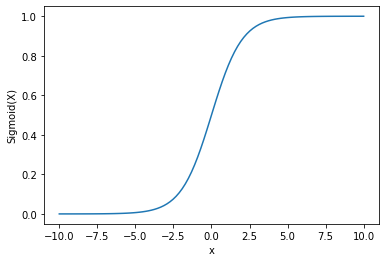

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
z = sigmoid(x);
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

### 2.3 Decision Boundary
Our current Prediction returns a probability between 0 and 1. In order to map this value to a discrete class, we select a threshold value or the tipping point. All values above this tipping point are classified into "Class 1", and all below to "Class 2".

For example if our threshold value was 0.5,

$$ p \ge 0.5 \implies class = 1 $$
$$ p \lt 0.5 \implies class = 2 $$

<img src="https://ik.imagekit.io/xtne6rmcgk/dec_bound_x1h0DJ13-6.png">


### 2.4 Making Predictions

Using our knowledge of sigmoid functions and decision boundaries, we can now write a prediction function. A prediction function in logistic regression returns the probability of our observation being positive, True, or “Yes”. We call this class 1 and its notation is $P(class=1)$.

As the probability gets closer to 1, our model is more confident that the observation is in class 1.

Given: the feature vector, weight matrix and bias
1. Linear function: 
    $$ z = w\cdot x + b $$
2. Applying activation: 
    $$ P(class = 1) = a = \hat y = S(z) $$
3. Check with threshold Value:
$$
\begin{equation}
    y_{prediction} =
    \begin{cases} 
        1 \text{, if } a \ge 0.5\\
        0 \text{, if } a \lt 0.5\\
    \end{cases}
\end{equation}
$$
    

In [7]:
def forward_propagation(w, b, x):
    """
    Calculate the probabilities and Predictions corresponding to the x
    
    Input:
        w: Weights Matrix
        b: bias
        x: Input Vector
    Returns:
        a: Probability of x belonging to class 1
        y_prediction: Class that x belongs
    """
    z = (np.matmul(w,x)) + b
    a = sigmoid(z)
    if(a>=0.5):
        y_pred = 1
    else:
        y_pred = 0
    
    return a, y_pred

### 2.5 The Loss Function: Log Loss

For a linear regression model you used the MSE Loss. However, the same can not be applied here. Why? There is a great math explanation in chapter 3 of Michael Neilson’s deep learning [book](http://neuralnetworksanddeeplearning.com/chap3.html), but for now I’ll simply say it’s because our prediction function is non-linear (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.

Instead of the MSE we will use a loss function called the Cross-Entropy Loss or the Log Loss, denoted by $\mathcal{L}(\hat y, y)$. Cross Entropy loss can be divided into two separate loss functions: one for y = 1, and other for y = 0.

1. if $y = 1$:
$$ \mathcal{L}(\hat y, 1) = -\log(\hat y) $$ 
2. if $y = 0$:
$$ \mathcal{L}(\hat y, 0) = -\log(1 - \hat y) $$ 

The benefits of taking the logarithm reveal themselves when you look at the loss function graphs for $y=1$ and $y=0$. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. 

-|-
- | - 
![alt](https://ik.imagekit.io/xtne6rmcgk/log_y__TYrTvZTL-.png) | ![alt](https://ik.imagekit.io/xtne6rmcgk/log2_uvK-wwZ7Y.png)

These expressions can be combined to give:

$$ \mathcal{L} (\hat y, y) = -[y\log(\hat y) + (1 - y)\log(1 - \hat y)] $$

> Exercise: Prove the above is true

> Loss function and Cost function are almost synonymous, with a small caveat that we will get to later

In [19]:
def compute_cost(a, y):
    """
    Calculates Cross entropy Loss
    
    Input:
        y: Known class, 0 or 1
        a: Calculated probability of belonging to class 1
    Returns:
        loss: Cross Entropy Loss
    """
            
    L = (y*np.log(a)) + ((1-y)*np.log(1-a))
    L = L * (-1)
    return L

In [23]:
compute_cost(0.3791, 0)

0.47658524061128993

In [24]:
compute_cost(0.3791, 1)

0.9699552564598479